In [1]:
import pandas as pd

In [5]:
customers = pd.read_csv('M:\Zepto Work\ecommerce\Customers.csv')
print(customers.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


<>:1: SyntaxWarning: invalid escape sequence '\Z'
<>:1: SyntaxWarning: invalid escape sequence '\Z'
C:\Users\max28\AppData\Local\Temp\ipykernel_11764\2183270888.py:1: SyntaxWarning: invalid escape sequence '\Z'
  customers = pd.read_csv('M:\Zepto Work\ecommerce\Customers.csv')


In [6]:
products = pd.read_csv('M:\Zepto Work\ecommerce\Products.csv')
transactions = pd.read_csv('M:\Zepto Work\ecommerce\Transactions.csv')

print(products.info())
print(transactions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


<>:1: SyntaxWarning: invalid escape sequence '\Z'
<>:2: SyntaxWarning: invalid escape sequence '\Z'
<>:1: SyntaxWarning: invalid escape sequence '\Z'
<>:2: SyntaxWarning: invalid escape sequence '\Z'
C:\Users\max28\AppData\Local\Temp\ipykernel_11764\2789122341.py:1: SyntaxWarning: invalid escape sequence '\Z'
  products = pd.read_csv('M:\Zepto Work\ecommerce\Products.csv')
C:\Users\max28\AppData\Local\Temp\ipykernel_11764\2789122341.py:2: SyntaxWarning: invalid escape sequence '\Z'
  transactions = pd.read_csv('M:\Zepto Work\ecommerce\Transactions.csv')


In [7]:
# Merge datasets
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')
print(merged_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [8]:
# Handle missing values
merged_data.dropna(inplace=True) 
merged_data.drop_duplicates(inplace=True)
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])


In [9]:
region_sales = merged_data.groupby('Region')['TotalValue'].sum()
print(region_sales)


Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


In [10]:
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print(top_products.head())


ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [11]:
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False)
print(top_customers.head())


CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


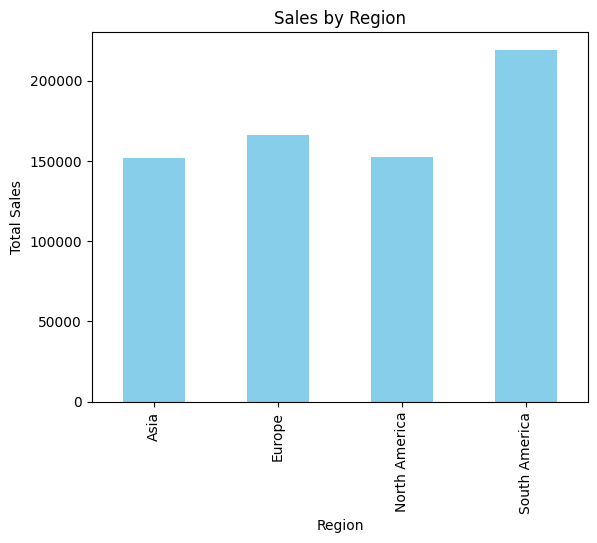

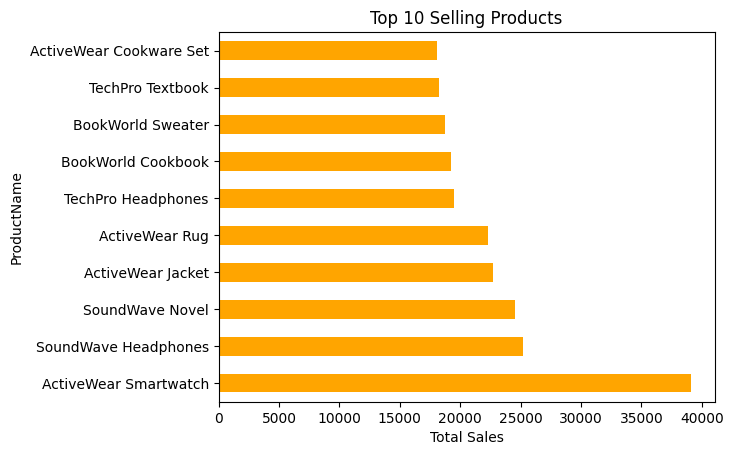

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

region_sales.plot(kind='bar', title='Sales by Region', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

top_products.head(10).plot(kind='barh', title='Top 10 Selling Products', color='orange')
plt.xlabel('Total Sales')
plt.show()
